In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor



# Reading dataset

In [3]:
df = pd.read_csv('data\Student Performance new.csv')
df.drop('Unnamed: 0',axis=1,inplace = True)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_103244\98796333.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\Student Performance new.csv')


In [4]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


# Separating dependent and independent variables

In [5]:
x=df.drop(columns=["math percentage"],axis = 1) # independent variables

In [6]:
y=df["math percentage"] # dependent variables

# Separating data into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Transforming independent variables

In [9]:
# separating numeric and categorical features
features = x.columns
num_features =[]
cat_features = []
for features in features:
    if df[features].dtype !='O':
        num_features.append(features)
    else:
        cat_features.append(features)

# applying transformations
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
std_scaler = StandardScaler()
clt =ColumnTransformer([
    ("OneHotEncoder",ohe,cat_features),
    ("StandardScaler",std_scaler,num_features)
]
) 


In [20]:
X_train_tranformed=clt.fit_transform(X_train)
X_test_tranformed=clt.transform(X_test)



# Creating an Evaluation function

In [18]:
def eval_func(Y_test,Y_pred):
    mae=mean_absolute_error(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    rmse=np.sqrt(mse)
    r2_square = r2_score(Y_test,Y_pred)
    return mae,mse,rmse,r2_square


In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "lasso" : Lasso(),
    "ridge" : Ridge(),
    "KNN" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XG Boost" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}
model_list = []
r2_list = []
results = []

for name,model in models.items():
    model.fit(X_train_tranformed,Y_train) # model training

    # Make predictions
    y_train_pred = model.predict(X_train_tranformed)
    y_test_pred = model.predict(X_test_tranformed)

    # Evaluating the model
    train_mae , train_mse , train_rmse , train_r2score = eval_func(Y_train,y_train_pred)
    test_mae , test_mse , test_rmse , test_r2score = eval_func(Y_test,y_test_pred)

    model_list.append(name)
    r2_list.append(test_r2score)
   
    results.append({
        "Model" : name,
        "training r2_score" : train_r2score,
        "testing r2_score" :test_r2score
    })

    print(f"----------------- {name} ------------------")
    print("Model Performance for training data")
    print(f"mae : {train_mae}")
    print(f"mse : {train_mse}")
    print(f"rmse : {train_rmse}")
    print(f"r2score : {train_r2score}")

    print(".........................................................................................")
    print("Model Performance for testing data")
    print(f"mae : {test_mae}")
    print(f"mse : {test_mse}")
    print(f"rmse : {test_rmse}")
    print(f"r2score : {test_r2score}")







----------------- Linear Regression ------------------
Model Performance for training data
mae : 0.042667118460719584
mse : 0.002833487038064859
rmse : 0.053230508527205136
r2score : 0.8743172040139593
.........................................................................................
Model Performance for testing data
mae : 0.04214763142474851
mse : 0.0029095169866715496
rmse : 0.05393993869732844
r2score : 0.8804332983749564
----------------- lasso ------------------
Model Performance for training data
mae : 0.11947471875
mse : 0.022544748593749997
rmse : 0.150149087888505
r2score : 0.0
.........................................................................................
Model Performance for testing data
mae : 0.12339849999999998
mse : 0.02474847140625
rmse : 0.15731646896065904
r2score : -0.01703929204145327
----------------- ridge ------------------
Model Performance for training data
mae : 0.04265005112727169
mse : 0.002833774179108889
rmse : 0.053233205606171126
r2scor

In [33]:
# converting result into data frame
results_df = pd.DataFrame(results)
#Sorting data frame in descending order w.r.t. r2score
results_df = results_df.sort_values(by = "testing r2_score",ascending=False)
print(results_df)

                Model  training r2_score  testing r2_score
2               ridge           0.874304          0.880592
0   Linear Regression           0.874317          0.880433
5       Random Forest           0.976572          0.853098
7  AdaBoost Regressor           0.853044          0.850516
6            XG Boost           0.995905          0.825160
3                 KNN           0.855998          0.786956
4       Decision Tree           0.999653          0.752300
1               lasso           0.000000         -0.017039


# Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(X_train_tranformed,Y_train)
y_pred = lr.predict(X_test_tranformed)
score = r2_score(Y_test,y_pred) * 100
print("Accuracy of the model is: ", score)

Accuracy of the model is:  88.04332983749565


# Plot y_predict and y_test

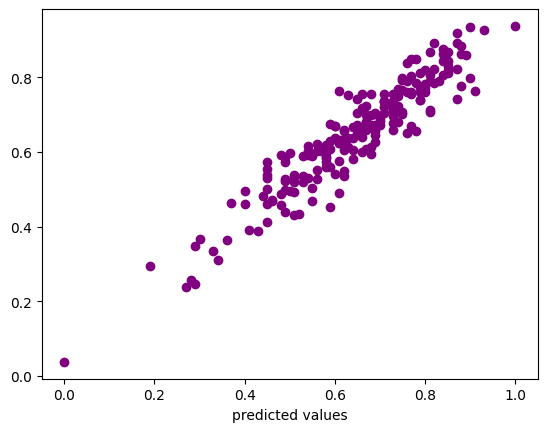

In [37]:
plt.scatter(Y_test,y_pred,color="purple")
plt.xlabel("Actual values")
plt.xlabel("predicted values")
plt.show()


# Difference between actual and predicted values

In [42]:
pred_df=pd.DataFrame( {
    "Actual Value" : Y_test ,
    "Predicted Values" : y_pred ,
    "Difference" : Y_test - y_pred
}
)

print(pred_df)

     Actual Value  Predicted Values  Difference
521          0.91          0.763880    0.146120
737          0.53          0.588860   -0.058860
740          0.80          0.769903    0.030097
660          0.74          0.768518   -0.028518
411          0.84          0.876274   -0.036274
..            ...               ...         ...
408          0.52          0.434091    0.085909
332          0.62          0.621522   -0.001522
208          0.74          0.678884    0.061116
613          0.65          0.670223   -0.020223
78           0.61          0.623451   -0.013451

[200 rows x 3 columns]
